In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load CSV files
edges_df = pd.read_csv('rfid_lyon_contacts.csv')
nodes_df = pd.read_csv('rfid_lyon_people.csv')


In [16]:
# Create a MultiGraph and add nodes and edges
G_multi = nx.MultiGraph()
for idx, row in nodes_df.iterrows():
    G_multi.add_node(row['ID'], status=row['status'])
for idx, row in edges_df.iterrows():
    G_multi.add_edge(row['ID1'], row['ID2'])

# Convert MultiGraph to a simple graph
G_simple = nx.Graph(G_multi)

# Count the edges from the MultiGraph and add as edge attribute in the simple graph
for u, v in G_simple.edges():
    G_simple[u][v]['count'] = G_multi.number_of_edges(u, v)


/var/folders/pg/b_b5rt890bv743nvlsg6pbhh0000gn/T/ipykernel_46872/3977620966.py:20: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G_simple, pos, edgelist=[(u, v) for u, v, _ in sorted_edges], width=2, edge_color=edge_colors)


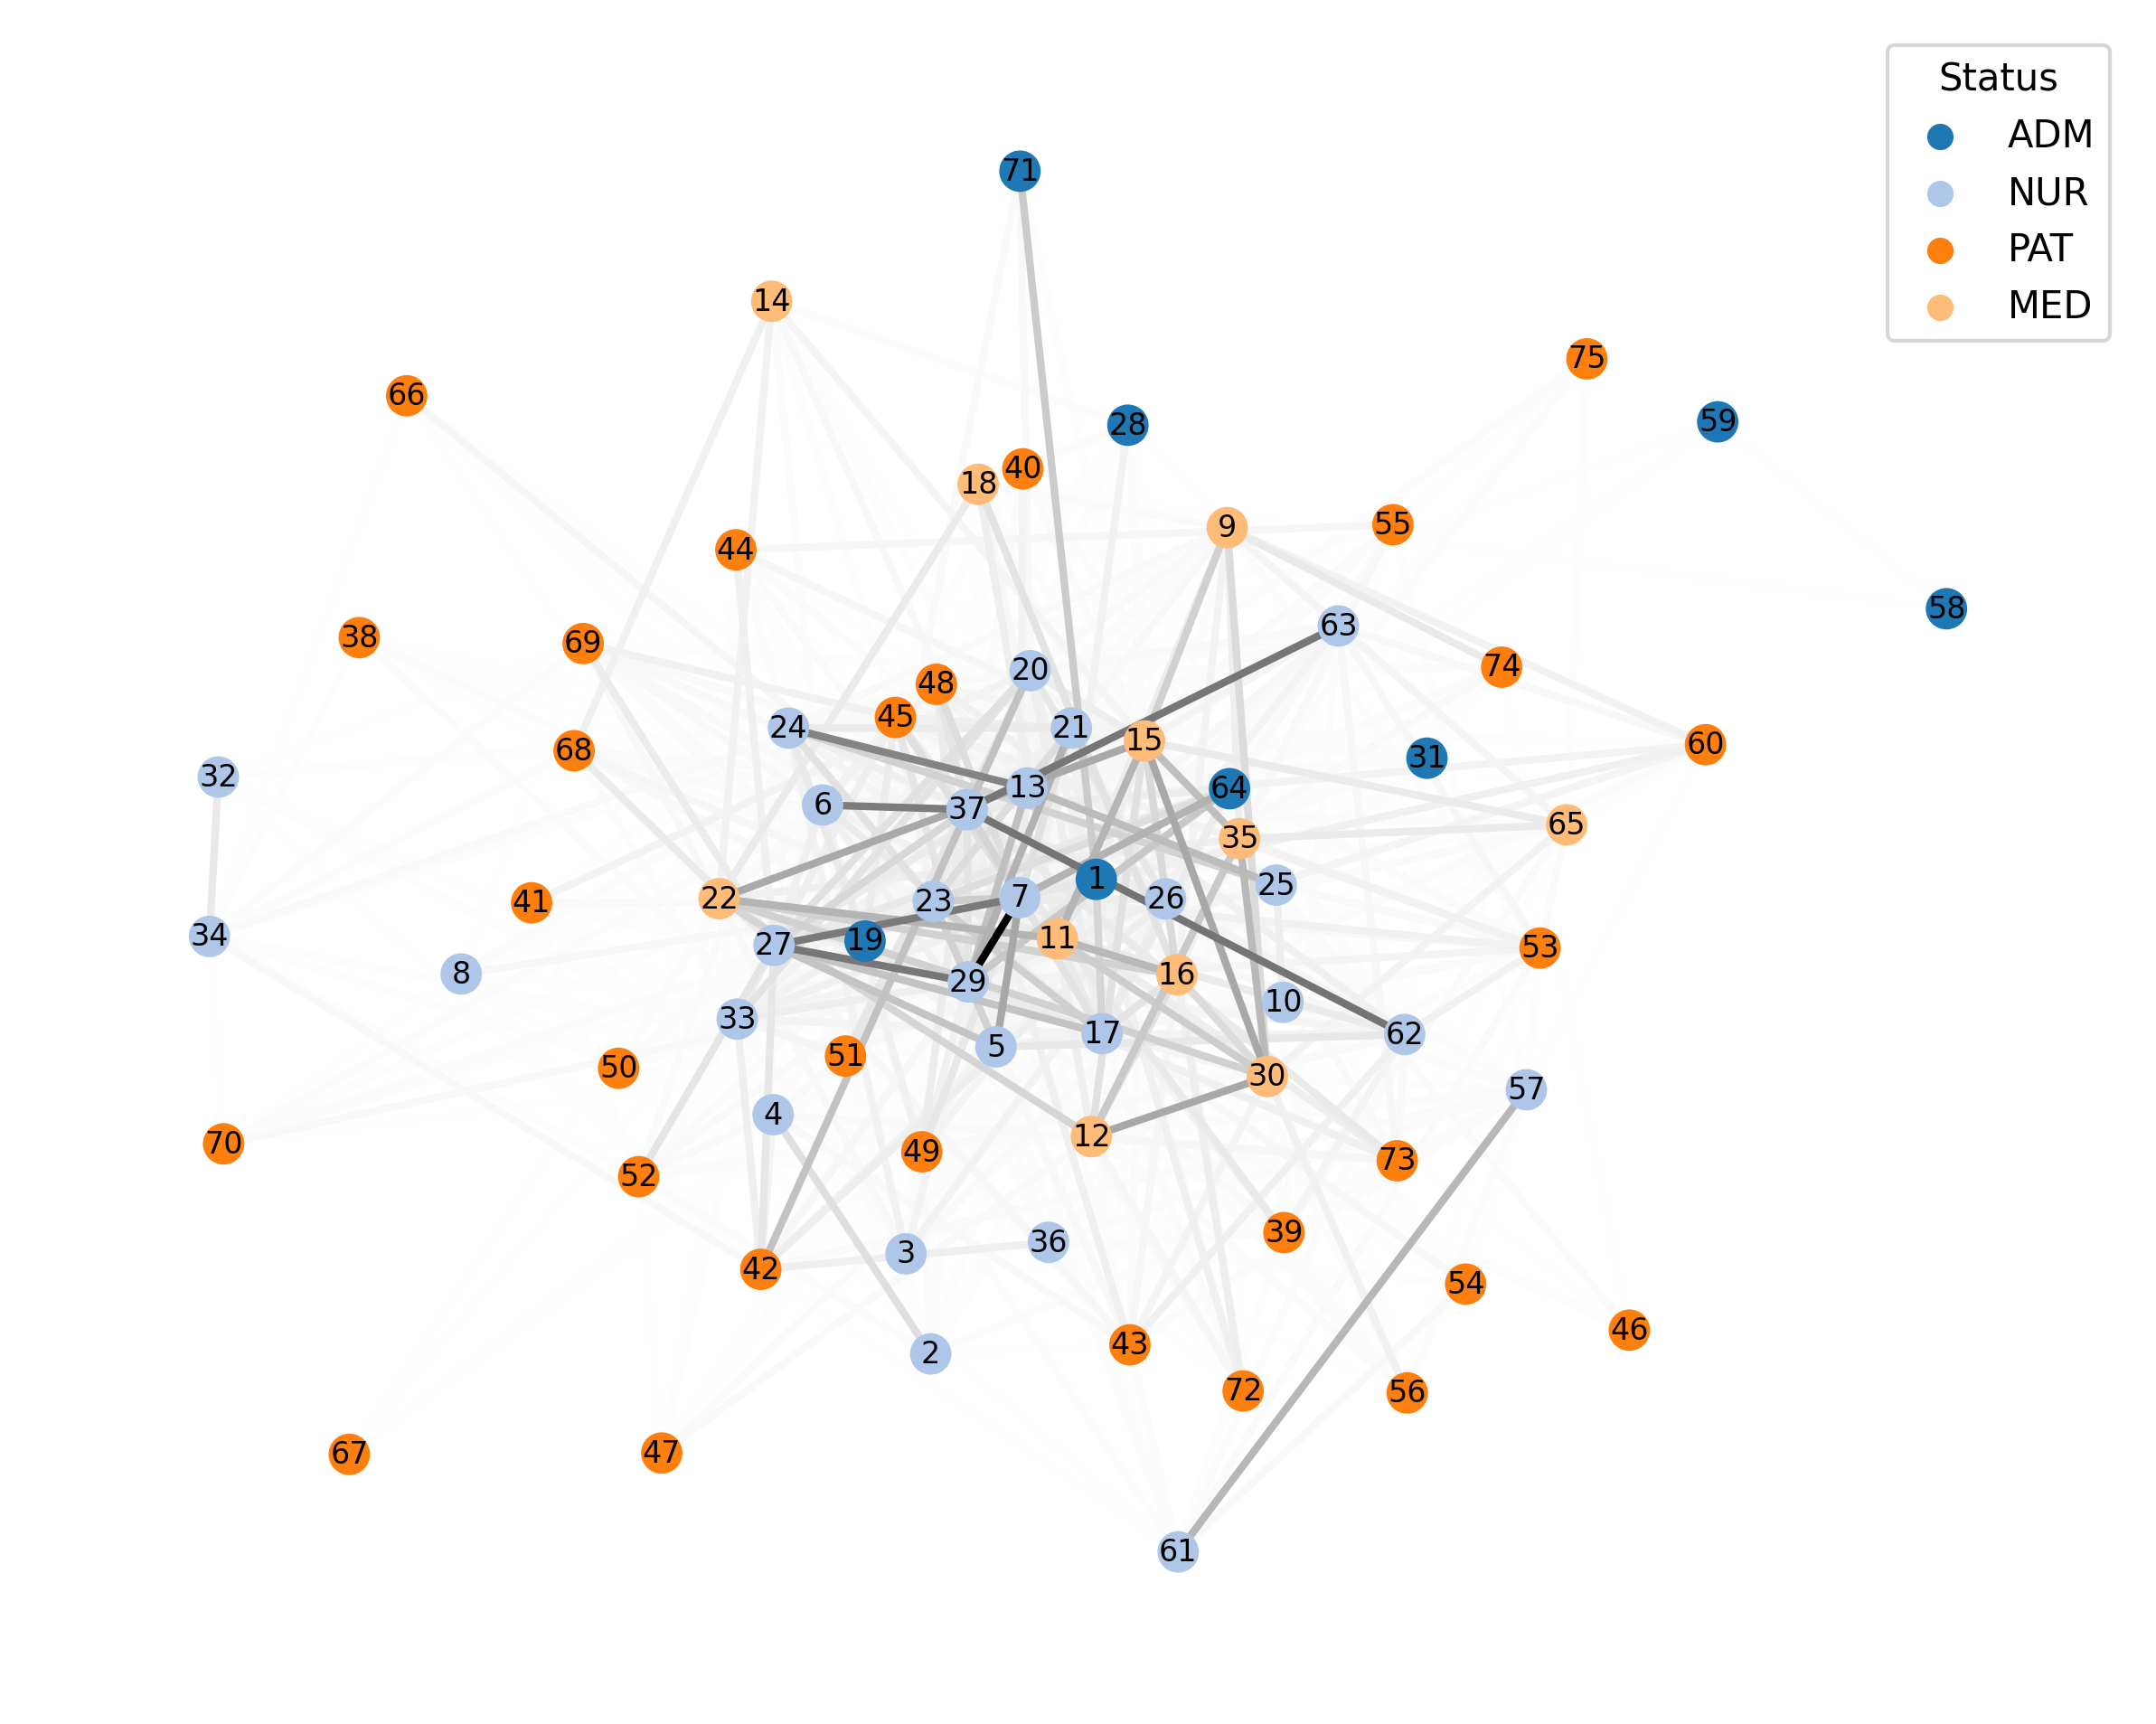

In [17]:
# Define a color map based on the unique statuses for nodes
unique_statuses = set(nodes_df['status'].unique())
color_map = {status: plt.cm.tab20(i) for i, status in enumerate(unique_statuses)}

# Determine the maximum count of edges for color mapping
max_count = max(nx.get_edge_attributes(G_simple, 'count').values())

# Visualization setup
plt.figure(figsize=(10, 8), dpi=300)
pos = nx.spring_layout(G_simple)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G_simple, pos, node_color=[color_map[G_simple.nodes[node]['status']] for node in G_simple], node_size=100)

# Sort edges by count and prepare color list
sorted_edges = sorted(G_simple.edges(data=True), key=lambda x: x[2]['count'])
edge_colors = [(1 - (data['count'] / max_count), ) * 3 for _, _, data in sorted_edges]

# Draw edges
nx.draw_networkx_edges(G_simple, pos, edgelist=[(u, v) for u, v, _ in sorted_edges], width=2, edge_color=edge_colors)

# Draw labels
nx.draw_networkx_labels(G_simple, pos, font_size=8)

# Create a legend for the node colors
for status, color in color_map.items():
    plt.scatter([], [], color=color, label=status)
plt.legend(title="Status", loc='best', bbox_to_anchor=(1, 1))

plt.axis('off')  # Turn off the axis
plt.show()


In [11]:
print(G_multi)

MultiGraph with 75 nodes and 32424 edges
